In [88]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np


In [18]:
os.chdir(r'G:\공유 드라이브\SicParvisMagna\데이터\코로나_매출')
covid = pd.read_csv('대구구별_확진자수_21-01-02~21-07-20.csv')
covid.index = covid.iloc[:, 0]
del covid['Unnamed: 0']
covid

,수성,달서,북,서,중,남,달성,동
Unnamed: 0,,,,,,,,
2021-01-02,13,5,4,5,0,2,2,2
2021-01-03,7,6,1,6,1,2,1,2
2021-01-04,12,5,3,0,1,1,0,7
2021-01-05,21,3,1,0,0,0,1,5
2021-01-06,10,4,1,4,1,1,0,2
...,...,...,...,...,...,...,...,...
2021-07-16,13,5,3,2,1,1,1,4
2021-07-17,3,6,2,4,4,3,2,4
2021-07-18,11,12,10,2,2,1,1,2


In [13]:
sales = pd.read_csv('일별매출_2021-01-02~2021-07-20.csv')
sales.index = sales.iloc[:, 0]
del sales['Unnamed: 0']
sales

,남김천휴게소(무보까국밥),무보까국밥(구평점),무보까국밥(상인점),무보까국밥(서구점),무보까국밥(서문점),무보까국밥(석적점),무보까국밥(성서점),무보까국밥(신평점),무보까국밥(안동점),무보까국밥(엑스코점),무보까국밥(옥계점),무보까국밥(용산점),무보까국밥(원대점),무보까국밥(장기점),무보까국밥(평리점),무보까국밥(황상점),무보까국밥과보쌈(신서점)
Unnamed: 0,,,,,,,,,,,,,,,,,
2021-01-02,0,"697,000","860,000","517,500","140,000","1,649,000","2,234,500","546,500","614,000","52,500","1,389,500","862,500","244,000","625,000","895,000","468,000","1,173,000"
2021-01-03,0,"684,500","874,500","1,039,500","67,500","1,581,000","2,287,000","335,500",0,"151,500","1,256,500","912,000","133,500","842,000","952,500","555,500","1,503,000"
2021-01-04,"93,000","581,500","712,500","736,000","277,500","1,623,500","1,715,500",0,"1,160,000","266,000","976,000","473,500","284,000","501,500","940,500","637,000","1,247,000"
2021-01-05,"100,000","809,000","900,500","618,500","309,500","1,349,500","1,840,000","808,000","673,500","174,500","858,000","745,000","346,500","710,500","446,000","380,000","1,047,000"
2021-01-06,"30,000","1,025,500","787,000","383,000","135,000","1,316,500","1,612,000",0,"755,000","111,000","1,197,500","456,000","89,000","652,500","835,500","375,000","1,351,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16,"38,500","1,286,500","922,500","417,000","122,000","2,340,000","1,647,000","541,500","498,500","361,000","2,198,000","501,000","244,500","850,500",0,"524,500","1,045,000"
2021-07-17,"37,500","1,431,000","1,174,000","417,500","80,000","3,173,500","3,041,500","447,500",0,"688,000","2,830,000","481,500","276,000","1,065,000",0,"562,000","1,396,000"
2021-07-18,0,"1,355,000","1,432,500","799,000","154,500","1,702,000","3,012,000","759,000",0,"343,500","1,686,500","801,000","217,500","1,080,500",0,"836,500","1,550,000"


In [31]:
covid_5 = covid['달서'][119:150]

In [79]:
sales_jang = sales['무보까국밥(장기점)'][119:180]
sales_seong = sales['무보까국밥(성서점)'][119:180]
sales_sang = sales['무보까국밥(상인점)'][119:180]
df_merge = pd.DataFrame()
df_merge['장기점'] = sales_jang
df_merge['성서점'] = sales_seong
df_merge['상인점'] = sales_sang
df_merge

,장기점,성서점,상인점
Unnamed: 0,,,
2021-05-01,"1,122,000","3,826,000","2,224,000"
2021-05-02,"1,130,000","3,642,500","1,874,500"
2021-05-03,"1,508,000","1,423,500","1,235,000"
2021-05-04,"1,304,000","3,416,000","1,901,500"
2021-05-05,"928,500","2,795,000","2,019,000"
...,...,...,...
2021-06-26,"1,240,500","3,967,000","2,045,500"
2021-06-27,"1,299,500","3,109,500","1,656,000"
2021-06-28,"948,000","2,203,000","1,809,500"


In [80]:
df_merge.iloc[0, 1]

'3,826,000'

In [81]:
sum_list = []
for a in range(0, len(df_merge)) :
    m1 = int(df_merge.iloc[a, 0].replace(',', ''))
    m2 = int(df_merge.iloc[a, 1].replace(',', ''))
    m3 = int(df_merge.iloc[a, 2].replace(',', ''))
    
    sales_sum = m1 + m2 + m3
    sum_list.append(sales_sum)

In [82]:
df_merge['3지점 합계'] = sum_list
df_merge['달서확진자'] = covid['달서'][119:180]
df_merge

,장기점,성서점,상인점,3지점 합계,달서확진자
Unnamed: 0,,,,,
2021-05-01,"1,122,000","3,826,000","2,224,000",7172000,0
2021-05-02,"1,130,000","3,642,500","1,874,500",6647000,0
2021-05-03,"1,508,000","1,423,500","1,235,000",4166500,1
2021-05-04,"1,304,000","3,416,000","1,901,500",6621500,1
2021-05-05,"928,500","2,795,000","2,019,000",5742500,2
...,...,...,...,...,...
2021-06-26,"1,240,500","3,967,000","2,045,500",7253000,8
2021-06-27,"1,299,500","3,109,500","1,656,000",6065000,2
2021-06-28,"948,000","2,203,000","1,809,500",4960500,2


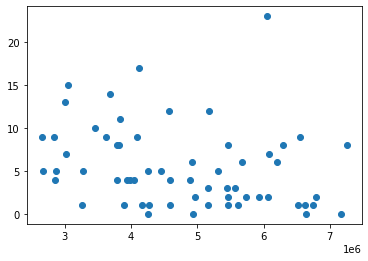

In [97]:
x = df_merge['3지점 합계']
y = df_merge['달서확진자']
plt.plot(x, y, 'o')

In [93]:
line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1, 1), y) ## x 는 2차원이여야하기 때문에 reshape

LinearRegression()

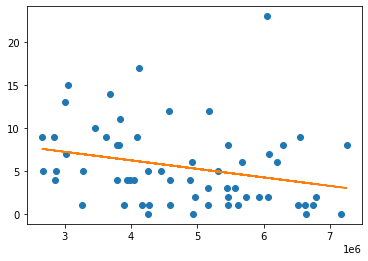

In [94]:
plt.plot(x, y, 'o')
plt.plot(x, line_fitter.predict(x.values.reshape(-1, 1)))
plt.show()

In [95]:
line_fitter.coef_

array([-9.90647832e-07])

In [102]:
df_merge.to_csv('5~6월_매출_확진자.csv', encoding = 'cp949')

In [101]:
df_merge

,장기점,성서점,상인점,3지점 합계,달서확진자
Unnamed: 0,,,,,
2021-05-01,"1,122,000","3,826,000","2,224,000",7172000,0
2021-05-02,"1,130,000","3,642,500","1,874,500",6647000,0
2021-05-03,"1,508,000","1,423,500","1,235,000",4166500,1
2021-05-04,"1,304,000","3,416,000","1,901,500",6621500,1
2021-05-05,"928,500","2,795,000","2,019,000",5742500,2
...,...,...,...,...,...
2021-06-26,"1,240,500","3,967,000","2,045,500",7253000,8
2021-06-27,"1,299,500","3,109,500","1,656,000",6065000,2
2021-06-28,"948,000","2,203,000","1,809,500",4960500,2
